In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

font = {'size'   : 12}

matplotlib.rc('font', **font)

In [2]:
data_dir = "/homes/ukumaras/Downloads"
fast_base = pd.read_json(f"{data_dir}/results_remote_new/FAST_KNN_NO_ObjIndex_base3_sub_timeline_1000000_500000.csv", lines=True)
fast_const_buffer = pd.read_json(f"{data_dir}/results_remote_new/FAST_KNN_NO_ObjIndex_const_buffer3_sub_timeline_1000000_500000.csv", lines=True)

## Creation time

In [3]:
def plot_all_ins(df):
    plt.figure(figsize=(16,3))
    sns.lineplot(x='index', y='insert_time', data=df[df['stage'] == 'INSERT'].loc[:, ['index', 'insert_time']], color='red', alpha=0.4)
    sns.lineplot(x='index', y='search_time', data=df[df['stage'] == 'INSERT'].loc[:, ['index', 'search_time']], color='blue', alpha=0.4)
    plt.xlabel('timestamp')
    plt.ylabel('time (nano)')
    plt.ylim(0, 200000000)
    ax2 = plt.twinx()
    sns.lineplot(x='index', y='totalDescendCount', data=df[df['stage'] == 'INSERT'].loc[:, ['index', 'totalDescendCount']], color='green', alpha=0.8, ax=ax2)
    plt.ylabel('count')
    plt.ylim(0, 50000000)

    custom_lines = [Line2D([0], [0], color='red', alpha=0.4, lw=4),
                    Line2D([0], [0], color='blue', alpha=0.4, lw=4),
                    Line2D([0], [0], color='green', lw=4)]
    ax2.legend(custom_lines, ['Insert (Query Index)', 'Search (Obj. Index)', 'Total Descend Count'])

    plt.show()

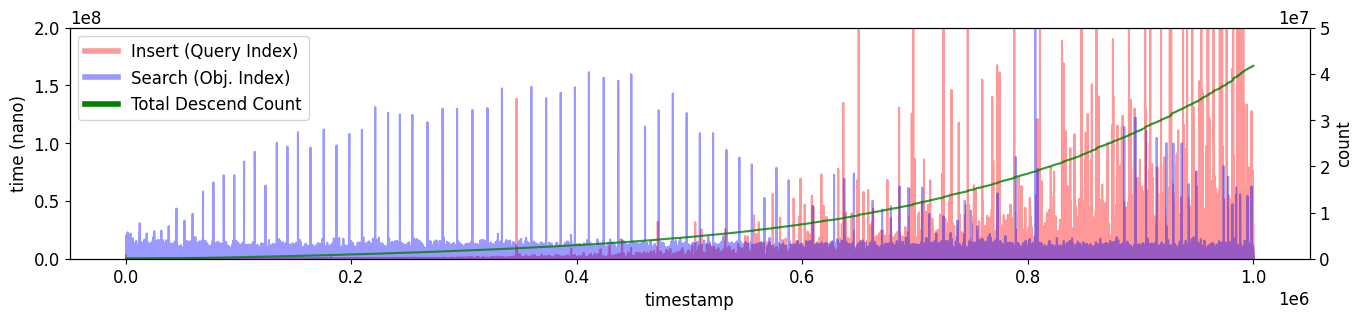

In [4]:
plot_all_ins(fast_base)

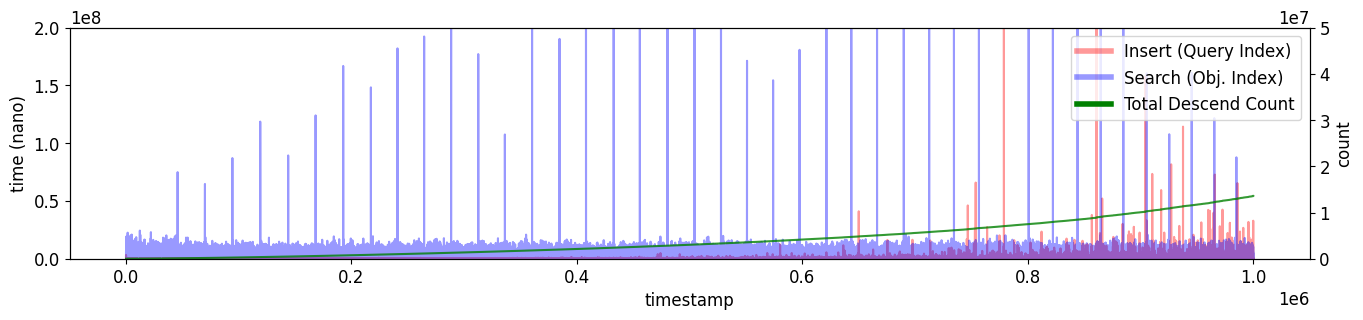

In [5]:
plot_all_ins(fast_const_buffer)

<Axes: xlabel='operation', ylabel='time (nano)'>

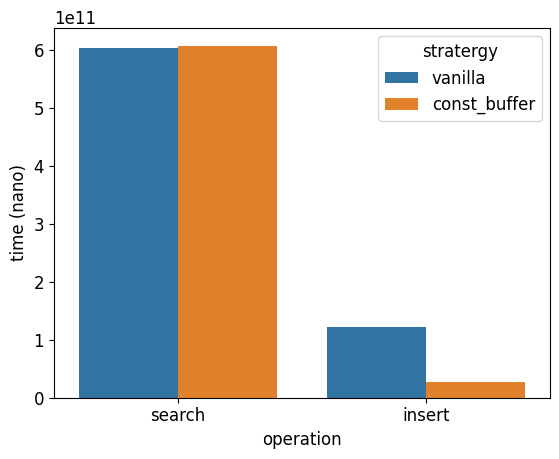

In [6]:
sum_map = [
    {"stratergy": "vanilla", "search": fast_base[fast_base['stage'] == "INSERT"]['search_time'].sum(), "insert": fast_base[fast_base['stage'] == "INSERT"]['insert_time'].sum()},
    {"stratergy": "const_buffer", "search": fast_const_buffer[fast_const_buffer['stage'] == "INSERT"]['search_time'].sum(), "insert": fast_const_buffer[fast_const_buffer['stage'] == "INSERT"]['insert_time'].sum()}
]
sum_df = pd.DataFrame(sum_map).melt(id_vars=['stratergy'], var_name="operation", value_name="time (nano)")
sns.barplot(x='operation', y='time (nano)', hue='stratergy', data=sum_df)

# Search time

In [7]:
fast_base[(fast_base['stage'] == 'SEARCH') & (fast_base['search_time'] > 10000000)].sort_values('search_time', ascending=False)

,index,search_time,insert_time,ar,descendCount,totalDescendCount,level,stage
1127609,227609,172407974,3300,0.0,-1,41742805,-1,SEARCH


In [8]:
fast_const_buffer[(fast_const_buffer['stage'] == 'SEARCH') & (fast_const_buffer['search_time'] > 10000000)].sort_values('search_time', ascending=False)

,index,search_time,insert_time,ar,descendCount,totalDescendCount,level,stage
1316196,416196,294682301,26767,0.0,-1,13576360,-1,SEARCH


In [9]:
def plot_all_search(df):
    plt.figure(figsize=(16,3))
    sns.lineplot(x='index', y='insert_time', data=df[df['stage'] == 'SEARCH'].loc[:, ['index', 'insert_time']], color='red', alpha=0.4)
    sns.lineplot(x='index', y='search_time', data=df[df['stage'] == 'SEARCH'].loc[:, ['index', 'search_time']], color='blue', alpha=0.4)
    plt.xlabel('timestamp')
    plt.ylabel('time (milis)')
    plt.ylim(0, 10000000)
    ax2 = plt.twinx()
    sns.lineplot(x='index', y='totalDescendCount', data=df[df['stage'] == 'SEARCH'].loc[:, ['index', 'totalDescendCount']], color='green', alpha=0.8, ax=ax2)
    plt.ylabel('count')
    # plt.ylim(0, 50000000)

    custom_lines = [Line2D([0], [0], color='red', alpha=0.4, lw=4),
                    Line2D([0], [0], color='blue', alpha=0.4, lw=4),
                    Line2D([0], [0], color='green', lw=4)]
    ax2.legend(custom_lines, ['Insert (Obj. Index)', 'Search (Query Index)', 'Total Descend Count'])

    plt.show()

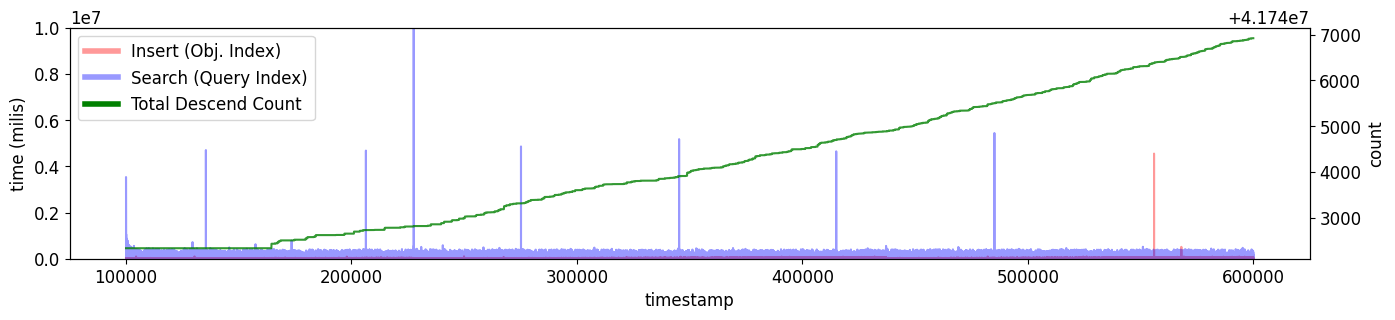

In [10]:
plot_all_search(fast_base)

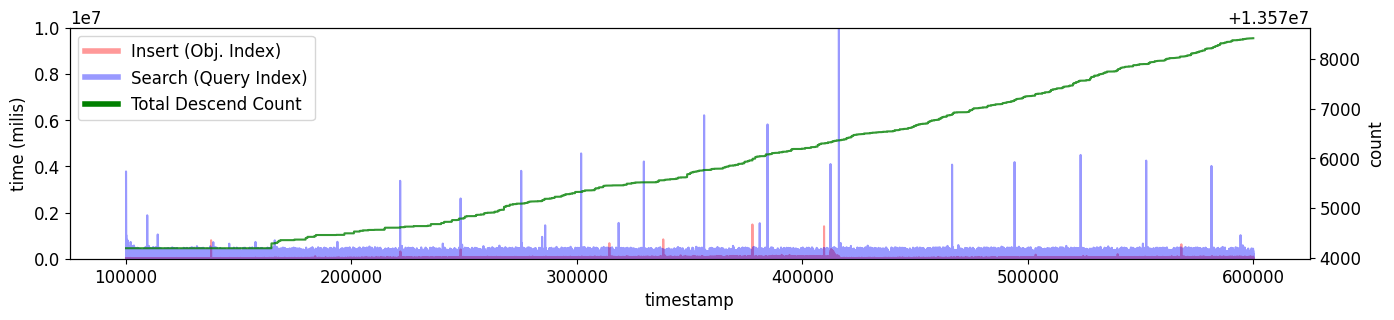

In [11]:
plot_all_search(fast_const_buffer)

In [12]:
fast_const_buffer[fast_const_buffer['stage'] == 'SEARCH']

,index,search_time,insert_time,ar,descendCount,totalDescendCount,level,stage
1000000,100000,624256,19378,0.0,-1,13574188,-1,SEARCH
1000001,100001,211764,4981,0.0,-1,13574188,-1,SEARCH
1000002,100002,3777990,15006,0.0,-1,13574188,-1,SEARCH
1000003,100003,104398,7766,0.0,-1,13574188,-1,SEARCH
1000004,100004,141619,3734,0.0,-1,13574188,-1,SEARCH
...,...,...,...,...,...,...,...,...
1499995,599995,195217,22660,0.0,-1,13578418,-1,SEARCH
1499996,599996,77534,7409,0.0,-1,13578418,-1,SEARCH
1499997,599997,27894,3477,0.0,-1,13578418,-1,SEARCH
1499998,599998,37380,3078,0.0,-1,13578418,-1,SEARCH


## Both

In [13]:
fail

NameError: name 'fail' is not defined

In [ ]:
def plot_all_both(df):
    plt.figure(figsize=(16,3))
    sns.lineplot(x='index', y='insert_time', data=df.loc[:, ['index', 'insert_time']], color='red', alpha=0.4)
    sns.lineplot(x='index', y='search_time', data=df.loc[:, ['index', 'search_time']], color='blue', alpha=0.4)
    plt.xlabel('timestamp')
    plt.ylabel('time (milis)')
    plt.ylim(0, 100000000)
    ax2 = plt.twinx()
    sns.lineplot(x='index', y='totalDescendCount', data=df.loc[:, ['index', 'totalDescendCount']], color='green', alpha=0.8, ax=ax2)
    plt.ylabel('count')
    plt.ylim(0, 50000000)

    custom_lines = [Line2D([0], [0], color='red', alpha=0.4, lw=4),
                    Line2D([0], [0], color='blue', alpha=0.4, lw=4),
                    Line2D([0], [0], color='green', lw=4)]
    ax2.legend(custom_lines, ['Insert (Obj. Index -> Query Index)', 'Search (Query Index -> Obj. Index)', 'Total Descend Count'])

    plt.show()

KeyboardInterrupt: 

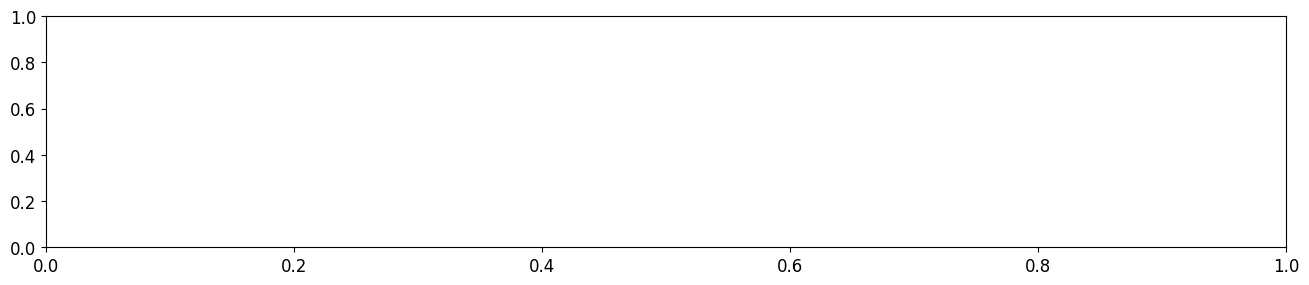

In [ ]:
plot_all_both(fast_base)

In [ ]:
plot_all_both(fast_const_buffer)